In [1]:
# Add this cell at the top of your notebook
import sys
import os

# Set the root folder as the working directory (if running from a subfolder)
sys.path.append(os.path.abspath("."))

# Import necessary modules
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from models.detector import RetinoblastomaDetector
from utils.dataset import load_dataset
from utils.evaluation import evaluate_model, plot_loss


In [2]:
# Initialize the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RetinoblastomaDetector().to(device)
model.load_state_dict(torch.load("models/retinoblastoma_detector.pth"))
model.eval()


C:\Users\amirn\AppData\Local\Temp\ipykernel_2932\3957107178.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("models/retinoblastoma_detec

RetinoblastomaDetector(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=200704, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)

In [3]:
# Load the dataset
data_dir = "Training"
_, class_names = load_dataset(data_dir)

# Split dataset (same as in train.py)
from torch.utils.data import random_split
train_loader, _ = load_dataset(data_dir)
train_size = int(0.8 * len(train_loader.dataset))
test_size = len(train_loader.dataset) - train_size
_, test_dataset = random_split(train_loader.dataset, [train_size, test_size])

# Create a DataLoader for the test set
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


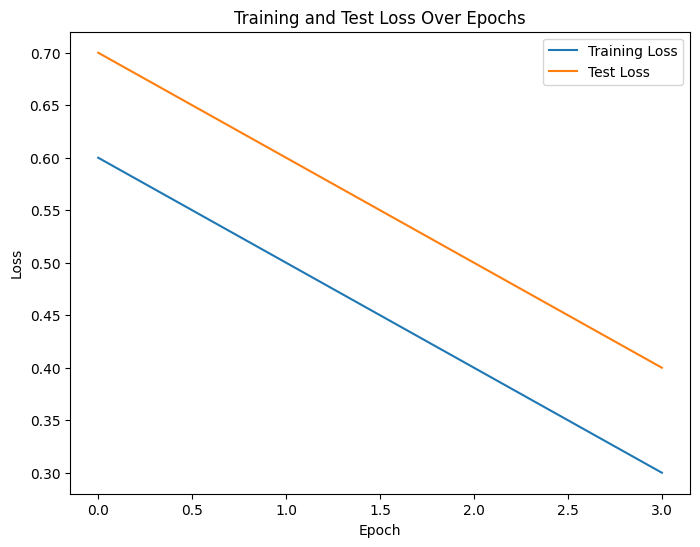

In [4]:
# Example loss curves (replace with actual values if saved during training)
train_losses = [0.6, 0.5, 0.4, 0.3]
test_losses = [0.7, 0.6, 0.5, 0.4]

# Plot
plot_loss(train_losses, test_losses)


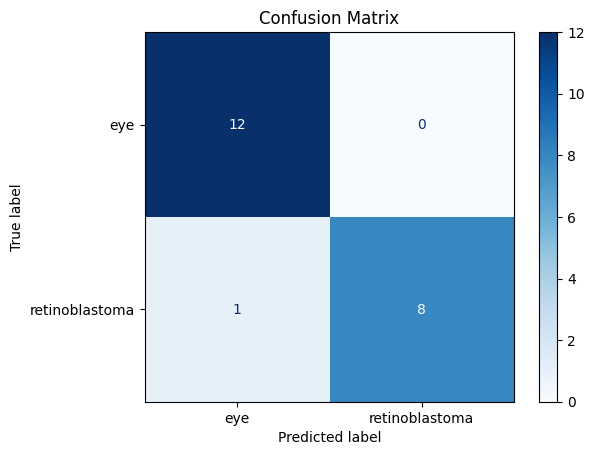

Classification Report:
                precision    recall  f1-score   support

           eye       0.92      1.00      0.96        12
retinoblastoma       1.00      0.89      0.94         9

      accuracy                           0.95        21
     macro avg       0.96      0.94      0.95        21
  weighted avg       0.96      0.95      0.95        21



In [5]:
evaluate_model(model, test_loader, class_names, device)


In [11]:
import os
from PIL import Image
import torch
from torchvision import transforms

# Define the transform for test images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalize to match training preprocessing
])

# Specify the file path
image_path = "Training/retinoblastoma/sample.jpg"  # Replace with your actual image path

# Check if the file exists
if not os.path.exists(image_path):
    print(f"Error: File not found at {image_path}. Please verify the file path.")
else:
    try:
        # Load and preprocess the image
        image = Image.open(image_path).convert("RGB")
        input_tensor = transform(image).unsqueeze(0).to(device)

        # Predict using the model
        model.eval()  # Ensure the model is in evaluation mode
        with torch.no_grad():  # Disable gradient calculation
            output = model(input_tensor)
            _, predicted = torch.max(output, 1)
            confidence = torch.softmax(output, 1).max().item()

        # Display the prediction results
        print(f"Predicted Class: {class_names[predicted.item()]}, Confidence: {confidence:.2%}")
    except Exception as e:
        print(f"An error occurred while processing the image: {e}")


Predicted Class: retinoblastoma, Confidence: 98.62%
